![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo


In [4]:
bikes.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
total           int64
hour            int64
dtype: object

In [5]:
bikes.shape

(10886, 12)

In [6]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


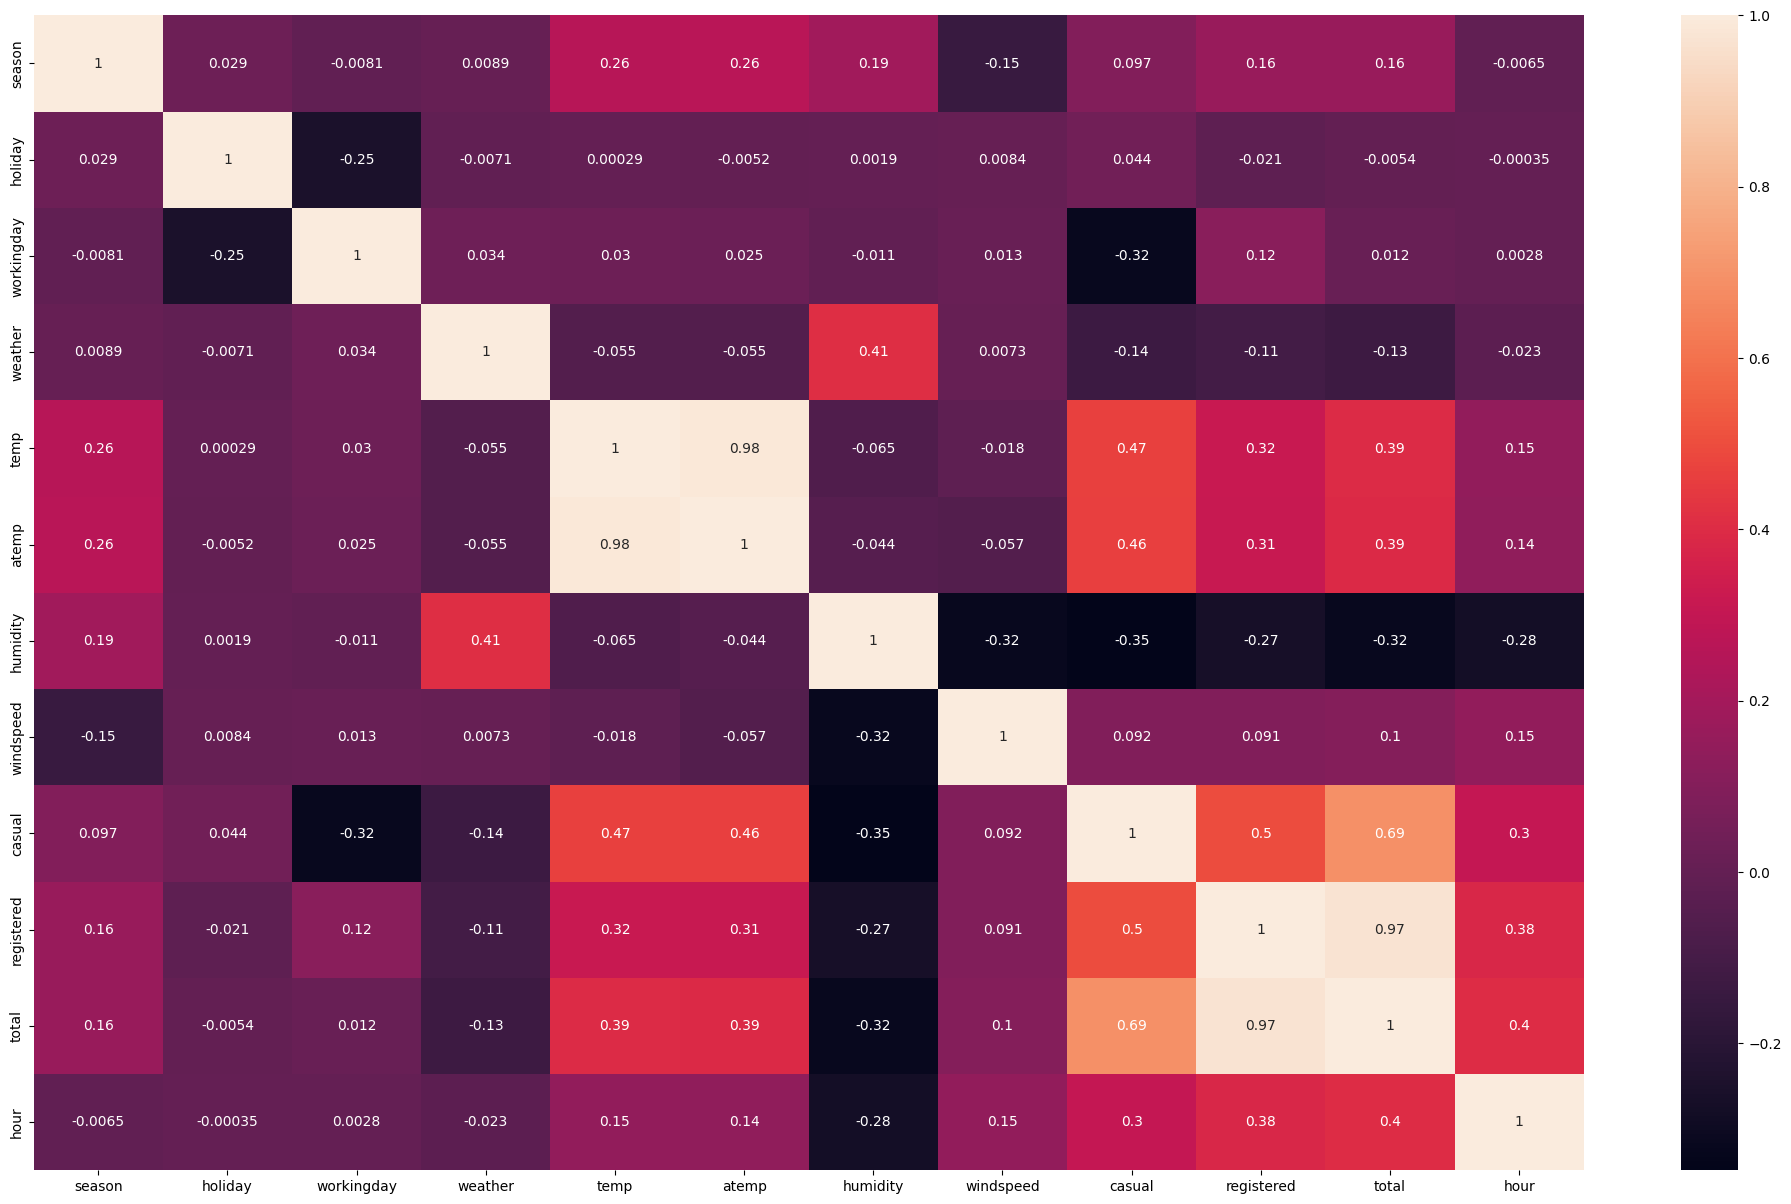

In [7]:
MatrixCorrelacion=bikes.corr()
fig, ax=plt.subplots(figsize=(25,15))
sns.heatmap(MatrixCorrelacion,annot=True);
plt.show()

In [8]:
bikes.isnull().mean()*100

season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
total         0.0
hour          0.0
dtype: float64

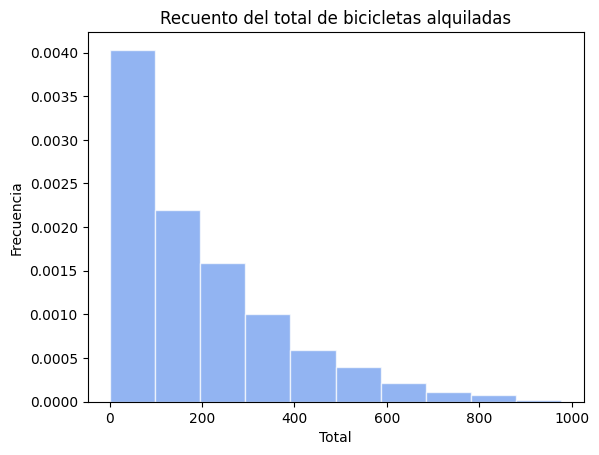

In [9]:
plt.hist(bikes['total'], density=True, color='cornflowerblue', edgecolor='white', alpha=0.7)
plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.title('Recuento del total de bicicletas alquiladas')
plt.show()

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [10]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

- Las estaciones que cuentan con un mayor número de alquileres con verano y primavera, que es lo esperado
- Las estaciones más frias y lluviosas repercuten negativa y directamente en el alquiler de las bicicletas
- Las bicicletas alquiladas en verano son el doble de las rentadas en invierno

In [11]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

- La hora con menos cantidad de bicicletas alquiladas es la comprendida entre las 3 am y las 4 am, siendo 6 la media.
- Las horas de la madrugada tienen una menor demanda de bicicletas como era de esperar.
- Las horas con mayor demanda son las comprendidas entre las 4 de la tarde y las 6 de la noche.
- La hora de la mañana con mayor número de alquileres es entre las 7 y 8 am.
- El comportamiento es similar a los diferentes sistemas de transporte público con respecto a las horas pico.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot: xlabel='hour'>

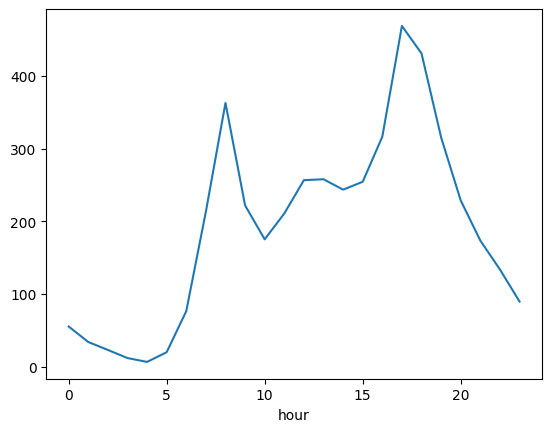

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot: xlabel='hour'>

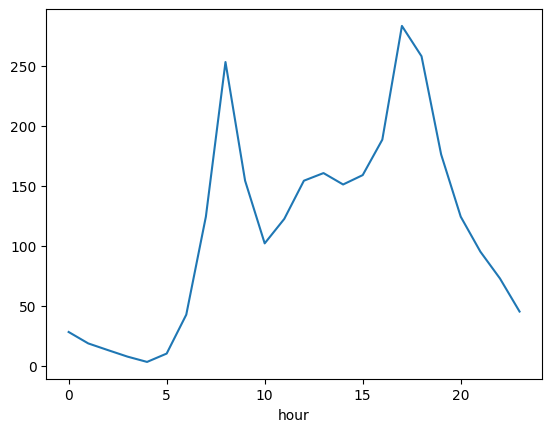

In [13]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
invierno = bikes.query('season == 1')
invierno.groupby('hour').total.mean().plot()

El alquiler de bicicletas en la estación de invierno tiene un comportamiento muy cercano al de la gráfica de todas las estaciones, la única diferencia significativa que se puede apreciar en la gráfica es la disminucíon de la cantidad de alquileres.


<AxesSubplot: xlabel='hour'>

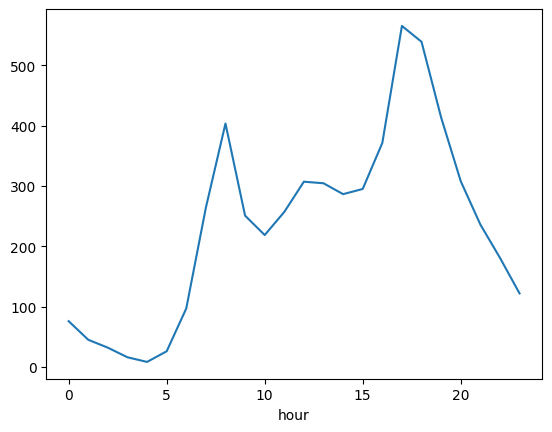

In [14]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
verano = bikes.query('season == 3')
verano.groupby('hour').total.mean().plot()

El alquiler de bicicletas en la estación de verano también tiene un comportamiento muy cercano al de todas anteriores, la  diferencia que se puede apreciar en la gráfica es aumnento de la cantidad de alquileres ya que es la estación con el mejor clima y por ende la de mayor cantidad de rentas por hora.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [16]:
# Celda 3
bikes['season'] = pd.factorize(bikes.season)[0]

In [17]:
feature_cols = [0,11]
X = bikes[bikes.columns[feature_cols]]
y = bikes['total']
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(XTrain, yTrain)

y_pred = lr.predict(XTest)
# Coeficientes
print("Coeficientes: \n", lr.coef_)
# MSE
print("MSE: %.2f" % mean_squared_error(yTest, y_pred))
# R cuadrado
print("R cuadrado: %.2f" % r2_score(yTest, y_pred))


Coeficientes: 
 [28.03619568 10.57944293]
MSE: 26895.62
R cuadrado: 0.18


Como se visualizaron los datos en las gráficas anteriores una regresión linel tiene una gran limitación para ajustarse en este caso, debería ser de un grado alto para que se logre ajustar medianamente al comportamiento de la variable objetivo; este modelo presenta poca flexibilidad y alta varianza.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [46]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [47]:
# Celda 4
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [48]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 191.57413191254824,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 55.437673900946024,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 32.58203249442498,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 25.177719821162444,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 76.25934065934067,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 213.11648351648353,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 124.43362831858407,
    'y_prob': 122.27

In [49]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [52]:
# Ejecución de función tree_predict
y_pred = tree_predict(XTest, tree)

In [56]:
# MSE
print("MSE: %.2f" % mean_squared_error(yTest, y_pred))
# R cuadrado
print("R cuadrado: %.2f" % r2_score(yTest, y_pred))

MSE: 17571.02
R cuadrado: 0.46


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [19]:
# Celda 5
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(XTrain, yTrain)

y_pred = dtr.predict(XTest)

# MSE
print("MSE: %.2f" % mean_squared_error(yTest, y_pred))
# R cuadrado
print("R cuadrado: %.2f" % r2_score(yTest, y_pred))

MSE: 13395.20
R cuadrado: 0.59


In [20]:
# Inicialización de rango de hiperparámetros para ajuste

parametros={"max_depth" : [1,3,5,7,9,11,12,],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10]}

# calcular diferentes métricas de regresión
from sklearn.model_selection import GridSearchCV
tuning_dtr=GridSearchCV(dtr, param_grid=parametros, scoring='neg_mean_squared_error', cv=3, verbose=3)
tuning_dtr.fit(X,y)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV 1/3] END max_depth=1, min_samples_leaf=1;, score=-21268.433 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=1;, score=-17233.452 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=1;, score=-43739.176 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=2;, score=-21268.433 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=2;, score=-17233.452 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=2;, score=-43739.176 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=3;, score=-21268.433 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=3;, score=-17233.452 total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=3;, score=-43739.176 total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=4;, score=-21268.433 total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=4;, score=-17233.452 total time=   0.0s
[CV 3/3] END max_depth=1,

[CV 3/3] END max_depth=9, min_samples_leaf=8;, score=-26748.989 total time=   0.0s
[CV 1/3] END max_depth=9, min_samples_leaf=9;, score=-17373.533 total time=   0.0s
[CV 2/3] END max_depth=9, min_samples_leaf=9;, score=-19284.154 total time=   0.0s
[CV 3/3] END max_depth=9, min_samples_leaf=9;, score=-26748.989 total time=   0.0s
[CV 1/3] END max_depth=9, min_samples_leaf=10;, score=-17373.533 total time=   0.0s
[CV 2/3] END max_depth=9, min_samples_leaf=10;, score=-19284.154 total time=   0.0s
[CV 3/3] END max_depth=9, min_samples_leaf=10;, score=-26748.989 total time=   0.0s
[CV 1/3] END max_depth=11, min_samples_leaf=1;, score=-17427.719 total time=   0.0s
[CV 2/3] END max_depth=11, min_samples_leaf=1;, score=-19283.301 total time=   0.0s
[CV 3/3] END max_depth=11, min_samples_leaf=1;, score=-26758.182 total time=   0.0s
[CV 1/3] END max_depth=11, min_samples_leaf=2;, score=-17427.719 total time=   0.0s
[CV 2/3] END max_depth=11, min_samples_leaf=2;, score=-19283.301 total time=   0

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [21]:
tuning_dtr.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [22]:
tuned_dtr= DecisionTreeRegressor(max_depth=7, 
                                 min_samples_leaf=1)

tuned_dtr.fit(XTrain, yTrain)

y_pred = tuned_dtr.predict(XTest)

# MSE
print("MSE: %.2f" % mean_squared_error(yTest, y_pred))
# R cuadrado
print("R cuadrado: %.2f" % r2_score(yTest, y_pred))

MSE: 13445.85
R cuadrado: 0.59


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [23]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [24]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [25]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [26]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = dtc.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.535
F1 Score: 0.536


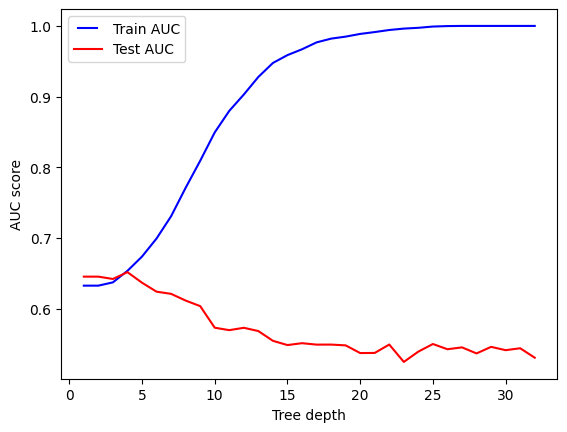

In [28]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in range(1,33):
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [29]:
tuned_dtc = DecisionTreeClassifier(max_depth=4)
tuned_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
y_pred = tuned_dtc.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.651
F1 Score: 0.635


In [31]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = lrc.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.613
F1 Score: 0.610


- Árbol de decisión 


Accuracy: 0.651
F1 Score: 0.635

- Regresión logística


Accuracy: 0.613
F1 Score: 0.610

El modelo de árbol de decisión con el parámetro max_depth optimizado presenta un mejor rendimiento que la regresión logística


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [52]:
# Celda 7
# Elección de los parametros
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

dtc = DecisionTreeClassifier()
param_dist = {
    "max_depth": sp_randint(1, 15),
    "min_samples_split": sp_randint(1, 15),
}
n_iter_search = 50
random_search = RandomizedSearchCV(
    dtc,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    n_jobs=-1,
    cv=5,
    verbose=1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000161B9705850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000161BA751910>},
                   verbose=1)

In [53]:
# X_train, X_test, y_train, y_test 
random_search.best_params_


{'max_depth': 1, 'min_samples_split': 14}

In [54]:
# Creación de 100 muestras de bootstrap
n_estimators = 100
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [77]:
# 100 árboles de decisión donde max_depth tome un valor de su elección
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees1 = {}
for i in range(n_estimators):
    trees1[i] = DecisionTreeClassifier(max_depth = 1, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df1 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df1.iloc[:, i] = trees1[i].predict(X_test)
    
# Votación mayoritaria
y_pred1 = (y_pred_df1.sum(axis=1) >= (n_estimators / 2)).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred1))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.645
F1 Score: 0.645


In [78]:
# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
trees2 = {}
for i in range(n_estimators):
    trees2[i] = DecisionTreeClassifier(min_samples_split = 14, random_state=seeds[i])
    trees2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df2 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df2.iloc[:, i] = trees2[i].predict(X_test)
    
# Votación mayoritaria
y_pred2 = (y_pred_df2.sum(axis=1) >= (n_estimators / 2)).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred2))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.649
F1 Score: 0.647


In [79]:
# 100 regresiones logísticas
trees3 = {}
for i in range(n_estimators):
    trees3[i] = LogisticRegression(random_state=seeds[i])
    trees3[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
# Predicción para los datos del set de test con cada modelo
y_pred_df3 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df3.iloc[:, i] = trees3[i].predict(X_test)
    
# Votación mayoritaria
y_pred3 = (y_pred_df3.sum(axis=1) >= (n_estimators / 2)).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred3))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.611
F1 Score: 0.617


In [80]:
# Ensamble
y_pred = ((y_pred_df1.sum(axis=1)+y_pred_df2.sum(axis=1)+y_pred_df3.sum(axis=1)) >= ((n_estimators*3) / 2)).astype(np.int32)
print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.624
F1 Score: 0.633


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [81]:
# Celda 8
samples_oob = []
# Obtención de las observaciones fuera de la bolsa "out-of-bag" para cada muestra
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))


In [84]:
# 100 árboles de decisión donde max_depth tome un valor de su elección
# Estimación de los errores OOB para cada clasificador
errors1 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_1 = trees1[i].predict(X_train.iloc[samples_oob[i]])
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_1)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors1) / (1 - errors1).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_1 = ((y_pred_df1) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred4 = (weighted_sum_1 >= 0.5).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred4))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.645
F1 Score: 0.645


In [85]:
# 100 árboles de decisión donde min_samples_leaf tome un valor de su elección
# Estimación de los errores OOB para cada clasificador
errors2 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_2 = trees2[i].predict(X_train.iloc[samples_oob[i]])
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_2)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors2) / (1 - errors2).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_2 = ((y_pred_df2) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred5 = (weighted_sum_2 >= 0.5).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred5))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.644
F1 Score: 0.645


In [89]:
# 100 regresiones logísticas
# Estimación de los errores OOB para cada clasificador
errors3 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_3 = trees3[i].predict(X_train.iloc[samples_oob[i]])
    errors3[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_3)
    
# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
alpha = (1 - errors3) / (1 - errors3).sum()

# Ponderación de las predicciones con los pesos alpha
weighted_sum_3 = ((y_pred_df3) * alpha).sum(axis=1)

# Desempeño al hacer votación ponderada
y_pred6 = (weighted_sum_3 >= 0.5).astype(np.int32)

print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred6))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.611
F1 Score: 0.617


In [88]:
#Ensamble
y_pred = ((weighted_sum_1+weighted_sum_2+weighted_sum_3) >= 1.5).astype(np.int32)
print('Accuracy: %.3f' % metrics.f1_score(y_test, y_pred))
print('F1 Score: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.624
F1 Score: 0.633


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

- Votación mayoritaria

1er modelo:
Accuracy: 0.645
F1 Score: 0.645


2do modelo
Accuracy: 0.649
F1 Score: 0.647


3er modelo
Accuracy: 0.611
F1 Score: 0.617


Ensamble de los 3 modelos
Accuracy: 0.624
F1 Score: 0.633

- Votacion ponderada

1er modelo:
Accuracy: 0.645
F1 Score: 0.645


2do modelo
Accuracy: 0.644
F1 Score: 0.645


3er modelo
Accuracy: 0.611
F1 Score: 0.617


Ensamble de los 3 modelos
Accuracy: 0.624
F1 Score: 0.633

- Los modelos presentaron rendimientos similares y hasta identicos para las diferente metodologías.
- El modelo que mejor performance obtuvo fu el de 100 árboles de decisión con el parametro min_samples_split = 14
- Ambas metodologías se vieron afectdas al intervenir en la votación un modelo con menor rendimiento